<a href="https://colab.research.google.com/github/lsuhpchelp/loniscworkshop2025/blob/main/day1/Bouncing_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

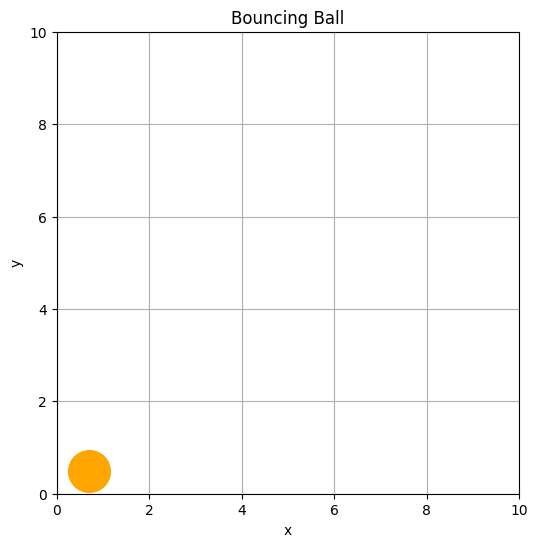

In [24]:
# Bouncing ball

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# This function is from the matplotlib.pyplot module (usually imported as plt) and it:
#Creates a new figure (fig); Adds one or more subplots (axes objects) to the figure (ax)

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_aspect('equal')
ax.set_title('Bouncing Ball')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_facecolor('white')
plt.grid(True)

# Ball settings
radius = 0.5

# This is tuple unpacking in Python. Here's what it means:
# ax.plot(...) returns a list of Line2D objects.
# By adding the comma after ball, like ball,, you're telling
# Python to unpack that one-element list into a single variable.

ball, = ax.plot([], [], 'o', markersize=30, color='orange')

# This creates a Line2D object, but it’s initially empty:
# [] for x-values and [] for y-values
# This is often done to initialize the object — then you update its data later.

# 'o' This is a format string that tells Matplotlib how to style the marker.
# 'o' = circle marker

#Ball state

# np.array([...]) creates a NumPy array, which is similar to a Python list,
# but more efficient and supports advanced mathematical operations.
# It creates a NumPy array to represent a 2D position, often used in simulations,
# animations, or physics models

position = np.array([5.0, 9.0])
velocity = np.array([0.1, -0.3])
gravity = -0.02

# This is a simple physics update function,
# commonly used in animations or simulations,
# especially for modeling motion under gravity.

# This defines a function named update, which takes one argument: frame.
# It’s often used with animation tools like matplotlib.animation.FuncAnimation.
# Each time it's called (for each animation frame), it updates the state of your object (e.g., a ball).

def update(frame):
  global position, velocity
  velocity[1] += gravity
  position += velocity

# velocity = np.array([vx, vy])
# velocity[0] = vx = horizontal (x-axis) velocity
# velocity[1] = vy = vertical   (y-axis) velocity

# Bounce from floor using the bottom of the ball
  if position[1] - radius < 0:
    position[1] = radius
    velocity[1] *= -0.9
    if abs(velocity[1]) < 0.05:
      velocity[1] = 0.0

# position = np.array([x, y])
# position[0] = x = horizontal position
# position[1] = y = vertical position

# Bounce from wall
  if position[0] - radius < 0 or position[0] + radius > 10:
    velocity[0] *= -1.0

# This line updates the position of the ball (a matplotlib plot object) by
# setting its new coordinates on the plot.
# ball.set_data([x], [y]) - This tells Matplotlib: "Set the ball’s position to (x, y)."
# You pass the values as lists ([x], [y]) because set_data() expects sequences
# (even if you're plotting just one point).

  ball.set_data([position[0]], [position[1]])

# This line is typically used inside an animation update function
# (e.g., for matplotlib.animation.FuncAnimation).
# It might look simple, but it has a very specific and important purpose.

  return ball,

# ball, creates a tuple with one element (a single-item tuple).
# Without the comma (return ball), you'd return just the ball object.
# But FuncAnimation expects an iterable, like a list or tuple of artists
# that have changed and need to be redrawn (especially when blit=True).


# This line is using Matplotlib's animation module to create a smooth,
# frame-by-frame animation. FuncAnimation creates animations by repeatedly
# calling a user-defined function (like update) for each frame.

anim = animation.FuncAnimation(fig, update, frames=500, interval=10, blit=True)

# Delay between frames in milliseconds.

# This code is used specifically in Jupyter Notebooks to display a Matplotlib
# animation inline using JavaScript (HTML5 video).
from  IPython.display import HTML
HTML(anim.to_jshtml())